In [ ]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import networkx.generators as gen
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torch.nn.functional as F
import networkx as nx
from sklearn.cluster import KMeans
from sklearn import metrics
from networkx.algorithms.community import greedy_modularity_communities,kernighan_lin
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

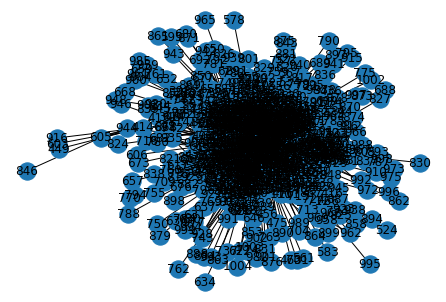

In [ ]:
g=nx.Graph()
with open('email-edges.txt') as f:
  for line in f:
    if(len(line)>0):
      x=(line.split())
      g.add_edge(int(x[0]),int(x[1]))

g.remove_nodes_from([658,653,648,798,731,772,670,691,675,684,660,711,744,808,746,580,633,732,703])
nx.draw(g,with_labels=True)

In [ ]:
print(g.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [ ]:
print(len(g.nodes()))

986


In [ ]:
tv=[]
with open('email-labels.txt') as f:
  for line in f:
    if(len(line)>0):
      x=line.split()
      tv.append(int(x[1]))
print(len(tv))
sideNodes=[658,653,648,798,731,772,670,691,675,684,660,711,744,808,746,580,633,732,703]
for node in sideNodes:
  q=tv.pop(node)
print(len(tv))

1005
986


In [ ]:
!wget https://github.com/adityachoudharyclg/internshipProjectClg/archive/master.zip
!unzip master.zip

--2020-07-12 15:52:49--  https://github.com/adityachoudharyclg/internshipProjectClg/archive/master.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/adityachoudharyclg/internshipProjectClg/zip/master [following]
--2020-07-12 15:52:50--  https://codeload.github.com/adityachoudharyclg/internshipProjectClg/zip/master
Resolving codeload.github.com (codeload.github.com)... 140.82.114.9
Connecting to codeload.github.com (codeload.github.com)|140.82.114.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [     <=>            ]   1.79M  1.46MB/s    in 1.2s    

2020-07-12 15:52:52 (1.46 MB/s) - ‘master.zip’ saved [1875899]

Archive:  master.zip
e3e3d501eeb57af5b27a12ae50d745d7f0a47079
   creating: internshipProjectClg-master/
  infla

segment2


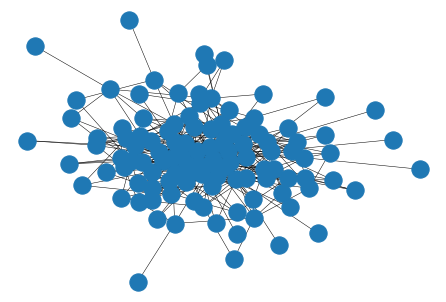

In [ ]:
# Load the dataset and return modularity matrix and truth values
def load_dataset(name):
  print("segment2")
  filename = 'internshipProjectClg-master/adjnoun.gml'
  G_data = nx.read_gml(filename)
  if(name=='polblogs'):
    G_data = G_data.to_undirected()
    G_data = nx.Graph(G_data)
  B_data = nx.modularity_matrix(G_data)
  # Karate
  if(name=='karate'):
    G_data=nx.karate_club_graph()
    B_data=nx.modularity_matrix(G_data)
  
  nx.draw(G_data,width=0.5)
  plt.show()
  return G_data, B_data
G_data,B_data=load_dataset('dolphins')

In [ ]:
# Train test split here batch size=train_ds
def givetrain(inputs,targets):  
  train_ds = TensorDataset(inputs, targets)
  train_dl=DataLoader(train_ds,batch_size=len(train_ds))
  return train_dl

In [ ]:
# Test The data
B_data=nx.modularity_matrix(g)
G_data=g
print(B_data.shape,len(G_data.edges()))


(986, 986) 16687


In [ ]:
class AE(nn.Module):
    def __init__(self,in_layers,hidden_layers):
        super().__init__()
        # Encoder
        self.encoder_hidden_layer = nn.Linear(
            in_features=in_layers, out_features=hidden_layers
        )
        self.encoder_output_layer = nn.Linear(
            in_features=hidden_layers, out_features=hidden_layers
        )
        # DEcoder
        self.decoder_hidden_layer= nn.Linear(
            in_features=hidden_layers, out_features=hidden_layers
        )
        self.decoder_output_layer = nn.Linear(
            in_features=hidden_layers, out_features=in_layers
        )

    def forward(self, features):
        activation = self.encoder_hidden_layer(features)
        activation = torch.tanh(activation)
        # activation = nn.Dropout(p=0.01)(activation)
        code = self.encoder_output_layer(activation)
        code = torch.tanh(code)
        # code = nn.Dropout(p=0.01)(code)
        encoder=code
        activation = self.decoder_hidden_layer(code)
        activation = torch.tanh(activation)
        # activation = nn.Dropout(p=0.01)(activation)
        activation = self.decoder_output_layer(activation)
        reconstructed = torch.tanh(activation)
        # reconstructed = nn.Dropout(p=0.01)(reconstructed)
        return encoder,reconstructed

In [ ]:
epochs = 1000
learning_rate = 1e-3

In [ ]:
#  use gpu if available
device = torch.device("cpu")

# create a model from `AE` autoencoder class
# load it to the specified device, either gpu or cpu
model1 = AE(hidden_layers=512,in_layers=B_data.shape[0]).to(device)
model2=AE(hidden_layers=256,in_layers=512).to(device)
model3=AE(hidden_layers=128,in_layers=256).to(device)
# create an optimizer object
# Adam optimizer with learning rate 1e-3
optimizer1 = optim.Adam(model1.parameters(), lr=learning_rate)
optimizer2 = optim.Adam(model2.parameters(), lr=learning_rate)
optimizer3 = optim.Adam(model3.parameters(), lr=learning_rate)

# mean-squared error loss
def loss_func(input,target):
  return F.mse_loss(input,target)
print(model2)

AE(
  (encoder_hidden_layer): Linear(in_features=512, out_features=256, bias=True)
  (encoder_output_layer): Linear(in_features=256, out_features=256, bias=True)
  (decoder_hidden_layer): Linear(in_features=256, out_features=256, bias=True)
  (decoder_output_layer): Linear(in_features=256, out_features=512, bias=True)
)


In [ ]:
def train_model(epochs,train_dl,model,optimizer,fl=0):
  enc,out=0,0
  hist=[]
  for epoch in range(epochs):
    loss = 0
    for batch_features, _ in train_dl:
      # reset the gradients back to zero
      # PyTorch accumulates gradients on subsequent backward passes
        # optimizer.zero_grad()
        optimizer.zero_grad()
        # compute reconstructions
        encoder,outputs = model(batch_features.float())
        # out=outputs
        if(fl==1):
          outputs=outputs.double()
        # compute training reconstruction loss
        train_loss = loss_func(outputs, batch_features)
        
        # compute accumulated gradients
        train_loss.backward()
        
        # perform parameter update based on current gradients
        optimizer.step()
        enc=encoder
        # add the mini-batch training loss to epoch loss
        loss += train_loss.item()
        
        # enc=encoder  
    # compute the epoch training loss
    loss = loss / len(train_dl)
    hist.append(loss)
    
    # display the epoch training loss
    print("epoch : {}/{}, recon loss = {:.8f}".format(epoch + 1, epochs, loss))
  return(enc,hist)

In [ ]:
# Training Data

B_data=np.asarray(B_data,dtype=np.float64)
inputs=torch.from_numpy(B_data)
targets=torch.from_numpy(B_data)

train_dl=givetrain(inputs,targets)

# AE 1 training
encoder,hist1=train_model(200,train_dl,model1,optimizer1,fl=1)
train_dl=givetrain(encoder.detach(),encoder.detach())
print(encoder.detach().shape)

# AE 2 training
encoder,hist2=train_model(200,train_dl,model2,optimizer2)
train_dl=givetrain(encoder.detach(),encoder.detach())
print(encoder.detach().shape)

# AE 3 training
# encoder,hist3=train_model(200,train_dl,model3,optimizer3)
# train_dl=givetrain(encoder.detach(),encoder.detach())
# print(encoder)
# print(encoder.detach().shape)
B_data_X=encoder.detach().numpy()


epoch : 1/200, recon loss = 0.02928868
epoch : 2/200, recon loss = 0.02750449
epoch : 3/200, recon loss = 0.02609327
epoch : 4/200, recon loss = 0.02453793
epoch : 5/200, recon loss = 0.02299877
epoch : 6/200, recon loss = 0.02181687
epoch : 7/200, recon loss = 0.02081893
epoch : 8/200, recon loss = 0.01991062
epoch : 9/200, recon loss = 0.01919646
epoch : 10/200, recon loss = 0.01864695
epoch : 11/200, recon loss = 0.01814408
epoch : 12/200, recon loss = 0.01765350
epoch : 13/200, recon loss = 0.01719038
epoch : 14/200, recon loss = 0.01675923
epoch : 15/200, recon loss = 0.01635082
epoch : 16/200, recon loss = 0.01596004
epoch : 17/200, recon loss = 0.01558509
epoch : 18/200, recon loss = 0.01522383
epoch : 19/200, recon loss = 0.01487927
epoch : 20/200, recon loss = 0.01455399
epoch : 21/200, recon loss = 0.01424409
epoch : 22/200, recon loss = 0.01394500
epoch : 23/200, recon loss = 0.01365398
epoch : 24/200, recon loss = 0.01336842
epoch : 25/200, recon loss = 0.01308699
epoch : 2

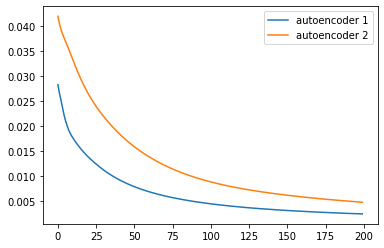

In [ ]:
# Plot training history
plt.plot(hist1,label='autoencoder 1')
plt.plot(hist2,label='autoencoder 2')
# plt.plot(hist3,label='autoencoder 3')
plt.legend()
plt.show()


In [ ]:
# Find number of clusters
def get_clusters():
  c_attributes = nx.get_node_attributes(G_data,'value')
  c_groups = []

  for i, val in enumerate(c_attributes.values()):
      c_groups.append(val)
  c_groups=tv
  # c_groups=[0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1]  
  return len(set(c_groups))
get_clusters()
# print(B_data_X)

42

In [ ]:
kmeans = KMeans(n_clusters=get_clusters(),init='k-means++')
kmeans.fit(B_data)
X_ae = kmeans.labels_
# ---------------------------------------------------------|Ground Truth|-------
c_attributes = nx.get_node_attributes(G_data,'value')
c_groups = []
c_groups=tv
for i, val in enumerate(c_attributes.values()):
    c_groups.append(val)
# c_groups=[0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1]        
X_gt = np.array(c_groups)
print(X_ae)
print(X_gt)

metrics.normalized_mutual_info_score(X_gt, X_ae, average_method='arithmetic')

[24 24 39 39 39 28 39 22 21 27  1 27 21 31  5 10 32 33 24 21 26 26  1 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15  5 32  1 21 10 10 30
  9  1  1  5  1  1 39 39 39 39 39 39 23  2 14 12  1  5 20  1 26 26  1  1
  1 24 24  1  9  1  1  1 26 26 25 32  4 24 38 32  1 39 20 20  1 15  5  5
 11 13 13 13 13 13 28  2 23 32 26 14 20  1 20 20 20 30 35  6  6  1  1  1
  1 25  0  6 13 13 39  1  5  1  0 39 39  1  1  6  6 12 39 10 10 22 29 20
  1 32  1 32  0  0 23 15 32 32 32 34  0  2  1  1 14 21 32 32 10  6 17  5
  1 36  6 30 40 32 12  1  1 24  0  0  0 23 23 37 26 13  1 26 26 26 26  0
 28 28 28 28  5  5  5  5  5  5  1  5  5  5  5  5 39  1 18  3 32 22  0 24
 10  1 24  1  1 24 24 24  1 24 24  1  1  1  1  0  5 32  1  1  1  1  1  1
  1  1  1  1  1  9 21 21 24 32 23  6  7 26 32 32  8  1 20  1  1 15  0  9
 27 27 27 21 24 10  1 39 10 10 10  1  1  0  0  1  5 39 32 23  0 12 12 26
  1  1  1  1  1 21  1 23 23 24  1 26  1  1  1 12  1 39  1  1  1 24 24 24
 24 24 24  1 24 24  9  1  2 23 10 13  1  1  1  1 20

0.46105598757268246

In [ ]:
max=0
index_max=0
for value,iter in enumerate(range(0,1000)):
    kmeans = KMeans(n_clusters=get_clusters(),random_state=value,init='k-means++')
    kmeans.fit(B_data_X)
    X_ae = kmeans.labels_
    #---------------------------------------------------------|Ground Truth|-------
    c_attributes = nx.get_node_attributes(G_data,'value')
    c_groups = []

    for i, val in enumerate(c_attributes.values()):
        c_groups.append(val)
    # Remove this in Other datasets
    # c_groups=[0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1]        
    c_groups=tv
    X_gt = np.array(c_groups)
    # print(X_ae)
    # print(X_gt)
    
    temp=metrics.normalized_mutual_info_score(X_gt, X_ae, average_method='arithmetic')
    if(temp>max):
        max=temp
        index_max=value
    print(max,index_max)
print(index_max,max)

0.3728617435291911 0
0.39300155180960517 1
0.43128985550136995 2
0.43128985550136995 2
0.43128985550136995 2
0.43128985550136995 2
0.43128985550136995 2
0.43128985550136995 2
0.43128985550136995 2
0.43128985550136995 2
0.43128985550136995 2
0.43128985550136995 2
0.43128985550136995 2
0.43128985550136995 2
0.43128985550136995 2
0.43128985550136995 2
0.43128985550136995 2
0.43128985550136995 2
0.43128985550136995 2
0.43128985550136995 2
0.43128985550136995 2
0.43128985550136995 2
0.4382996156567245 22
0.4382996156567245 22
0.4382996156567245 22
0.4382996156567245 22
0.4382996156567245 22
0.4382996156567245 22
0.4382996156567245 22
0.4382996156567245 22
0.4382996156567245 22
0.4382996156567245 22
0.4382996156567245 22
0.4382996156567245 22
0.4446330530311086 34
0.4446330530311086 34
0.4446330530311086 34
0.4446330530311086 34
0.4446330530311086 34
0.4446330530311086 34
0.4446330530311086 34
0.4446330530311086 34
0.4446330530311086 34
0.4446330530311086 34
0.4446330530311086 34
0.444633053

KeyboardInterrupt: ignored

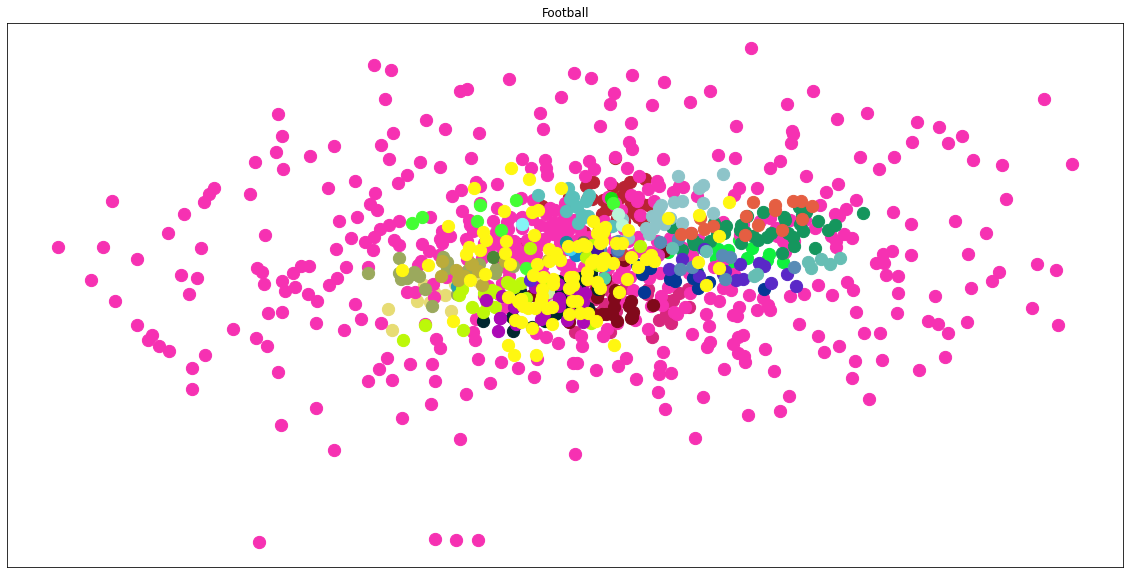

In [ ]:
# Drawing the graph
G=G_data
kmeans = KMeans(init='k-means++',n_clusters=get_clusters(),random_state=index_max)
kmeans.fit(B_data_X)
X_ae = kmeans.labels_

labels_dict={}
for index,item in enumerate(X_ae):
    labels_dict[item]=[]

for index,item in enumerate(X_ae):
    labels_dict[item].append(list(G.nodes)[index])

G=G_data
pos=nx.spring_layout(G)
plt.figure(figsize=(20,10))
colors=['#f20905','#ab7533','#de9c0d','#a5e841','#09ed7b','#0af0e0','#0f5ea8','#08046e','#9c2be3','#e607c4','#e607c4','#0a0105']
for key,col in enumerate(labels_dict):
  rgb = np.random.rand(3,)
  nx.draw_networkx_nodes(G,pos,nodelist=labels_dict[key],node_color=[rgb],node_size=150,width=0.15,)

plt.title('Football')
plt.show()
